---

# Tree SHAP

---


In [1]:
!pip install shap
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.datasets as ds
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap 
import graphviz
sns.set_style('darkgrid')

     |████████████████████████████████| 358kB 7.7MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491623 sha256=322182abb274d1c2ff53a6fa6b239483c7c00d31bf4582f1a767a7909fb8e532
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


## Breast Cancer Dataset

In [2]:
# load the famous breast cancer data from sklearn inbuilt datasets
# a supervised binary classification problem
data = ds.load_breast_cancer()
# define predictors as pandas dataframe
X = pd.DataFrame(data['data'], columns=data['feature_names'])
# define target as pandas series
y = pd.Series(data['target'])

In [3]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# sample first few rows and few columns
X_train.iloc[:5, :12]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,0.4537,0.8733
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,0.7572,0.7813
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,0.1746,1.3050
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,0.2666,0.8309
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,0.3833,0.9078


### DecisionTreeClassifier 

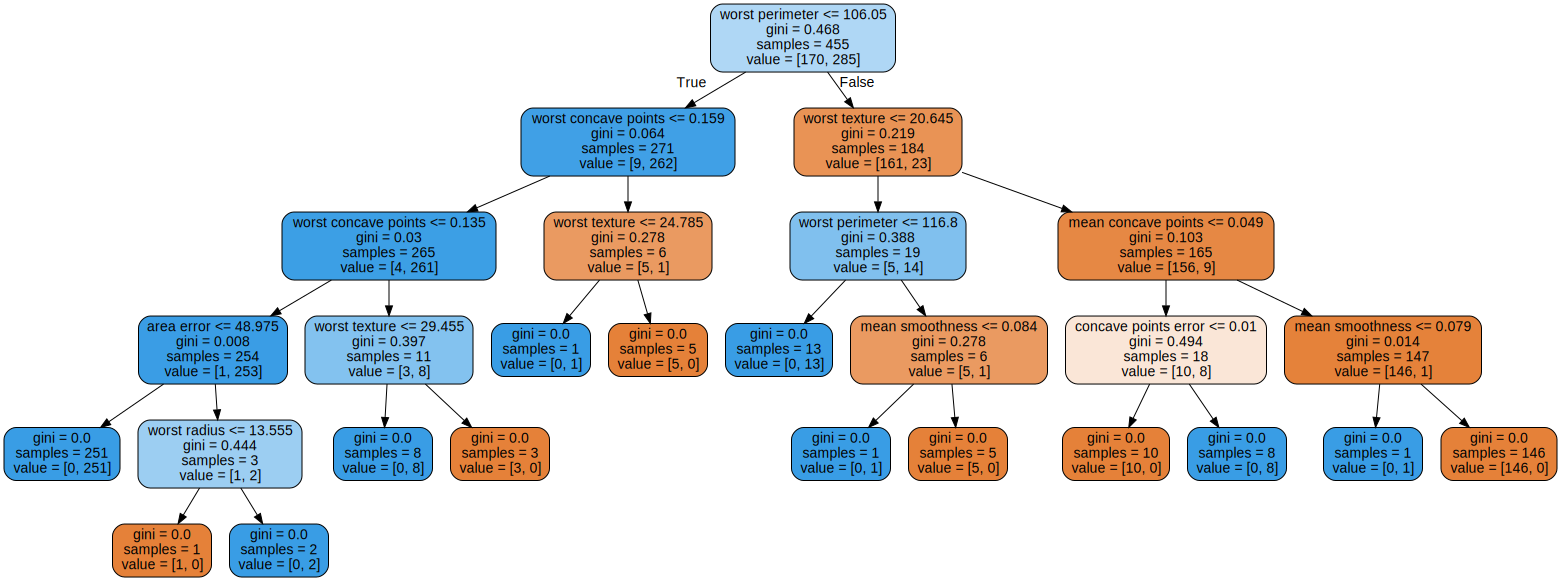

In [4]:
model = DecisionTreeClassifier(random_state=1, max_depth=5)

# train the model data
model.fit(X_train, y_train)
# Visualize how model classified the entire data
tree_graph = export_graphviz(model, out_file=None, feature_names = data['feature_names'], rounded=True, filled=True)
graphviz.Source(tree_graph)

### SHAP Force Plot
Force plots can be made interactive by plotting it with more data points. Here we plotted it with all of the test data. By hovering mouse pointer over the regions of plot, we can observe shap values interactively.

In [5]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(model)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[0])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

Dropdown options are shown in the interactive plot to select features of interest. It gives a better understanding on how two different features interact with each other in predicting the outputs.

In [6]:
shap.initjs()
# obtain shap values for the test data
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

### SHAP Summary Plot
Summary plots are easy-to-read visualizations which bring the whole data to a single plot. All of the features are listed in y-axis in the rank order, the top one being the most contributor to the predictions and the bottom one being the least or zero-contributor. Shap values are provided in the x-axis. As we discussed already, a value of zero represents no contribution whereas contributions increase as the shap value moves away from zero. Each circular dot in the plot represents a single data point. Color of the dot denotes the value of that corresponding feature. It can be observed that the feature ‘worst perimeter’ contributes greatly to the model’s prediction with low values deciding one class and higher values deciding the other.

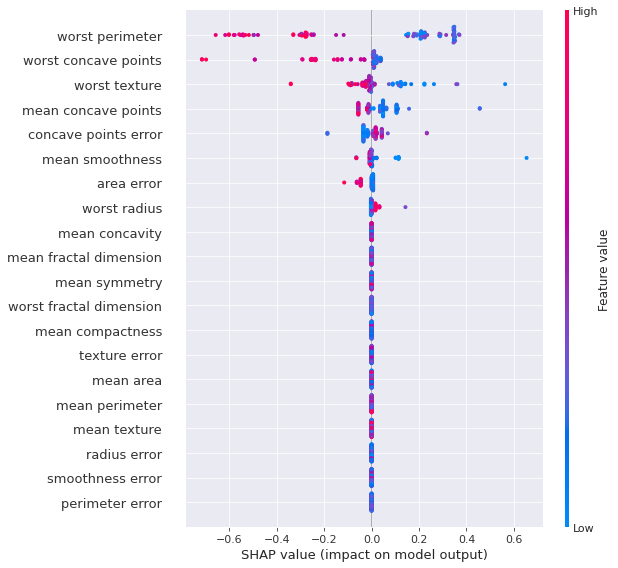

In [7]:
shap.summary_plot(shap_values[1], X_test)

Summary plot can also be visualized as a bar plot for quick reading with minimum details.

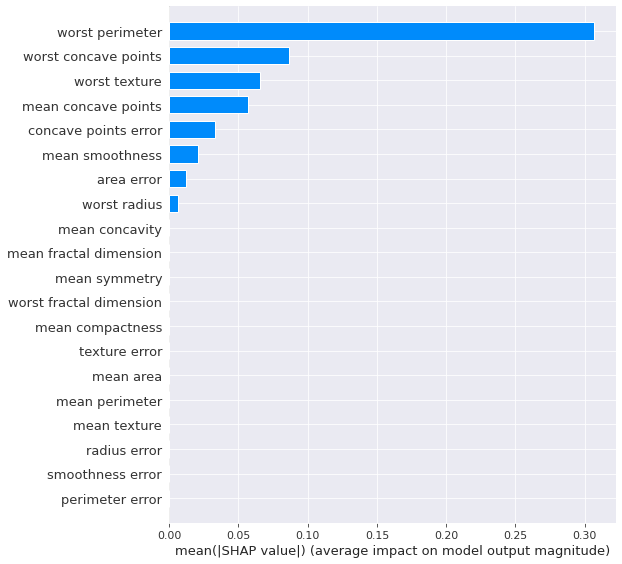

In [8]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

### SHAP Dependence Plot
Dependence plots can be of great use while analyzing feature importance and doing feature selection. It makes one-versus-one plot against two features by plotting shap values of one feature and coloring the dots with respect to another interactive feature.



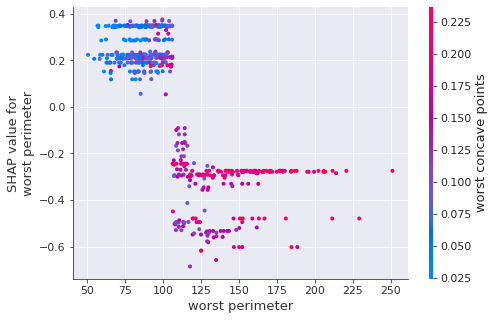

In [9]:
# we use whole of X data from more points on plot
shap_values = explainer.shap_values(X)
shap.dependence_plot('worst perimeter', shap_values[1], X, interaction_index='worst concave points')

If the interactive feature is not provided by the user, SHAP determines a suitable feature on its own and uses that as the interactive feature

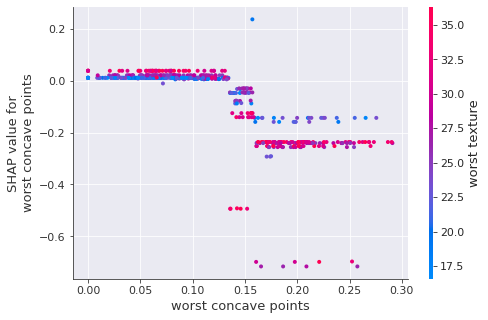

In [10]:
shap.dependence_plot('worst concave points' , shap_values[1], X)

### SHAP Decision Plot
The decision plot, as like the summary plot, it gives an overall picture of contribution to prediction. 

From bottom to top of the decision plot, shap values are cumulatively added to the base value of the model in determining the output values. It can be observed that certain strings colored in blue resulted in final class value 0 and the remaining strings colored in red resulted in final class value 1.

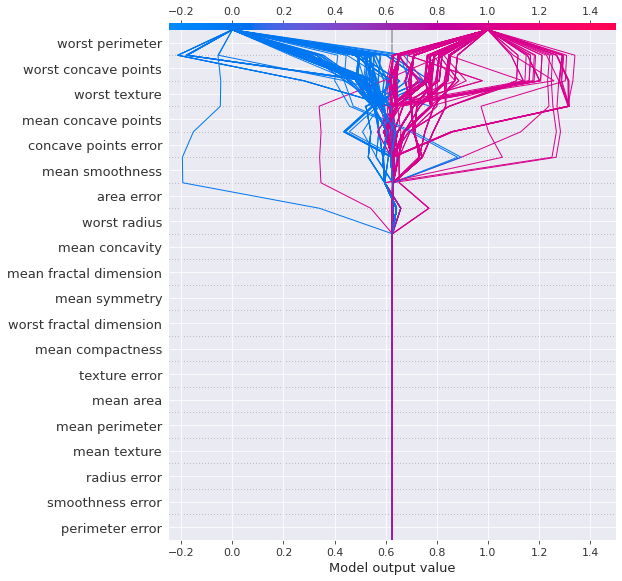

In [11]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)

## Zoo Dataset

In [12]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

--2021-04-26 20:32:13--  https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4126 (4.0K) [application/x-httpd-php]
Saving to: ‘zoo.data’

zoo.data            100%[===================>]   4.03K  --.-KB/s    in 0s      

2021-04-26 20:32:13 (93.3 MB/s) - ‘zoo.data’ saved [4126/4126]



In [13]:
feature_names = ['hair',
                'feathers',
                'eggs',
                'milk',
                'airborne',
                'aquatic',
                'predator',
                'toothed',
                'backbone',
                'breathes',
                'venomous',
                'fins',
                'legs',
                'tail',
                'domestic',
                'catsize',
                'class']
dataset = pd.read_csv('/content/zoo.data', header=None, names=feature_names)
X = dataset.drop('class', axis=1)
# define target as pandas series
y = dataset['class']

map_class_names = {1: 'Mammal', 2: 'Bird', 3: 'Reptile', 4: 'Fish', 5: 'Amphibian', 6: 'Bug', 7: 'Invertebrate'}
y = y.map(map_class_names)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### DecisionTreeClassifier 

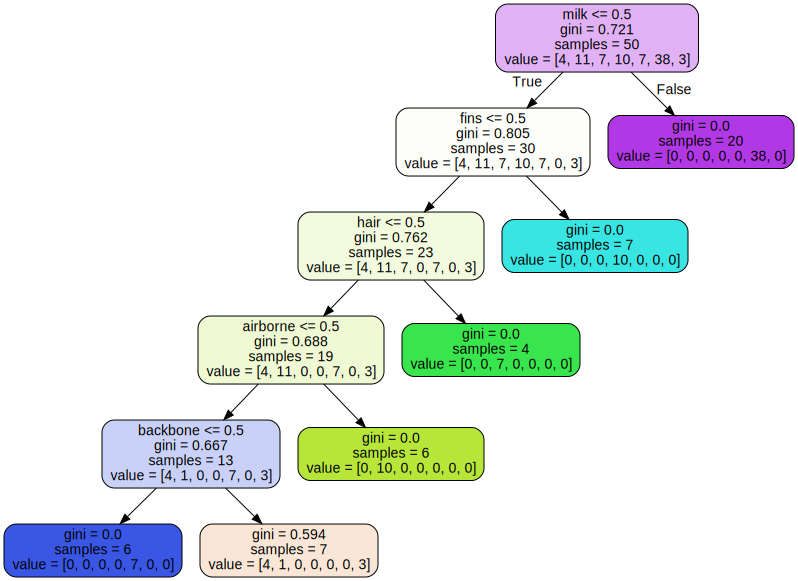

In [14]:
model = RandomForestClassifier(random_state=1, max_depth=5, n_estimators=50)

# train the model data
model.fit(X_train, y_train)
# Visualize how model classified the entire data
tree_graph = export_graphviz(model.estimators_[0], out_file=None, feature_names = feature_names[:-1], rounded=True, filled=True)
graphviz.Source(tree_graph)

### SHAP Force Plot for one instance

In [15]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# Define a tree explainer for the built model
explainer = shap.TreeExplainer(model)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test.iloc[7])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

### SHAP Force Plot

In [16]:
shap.initjs()
# obtain shap values for the test data
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

### SHAP Summary Plot

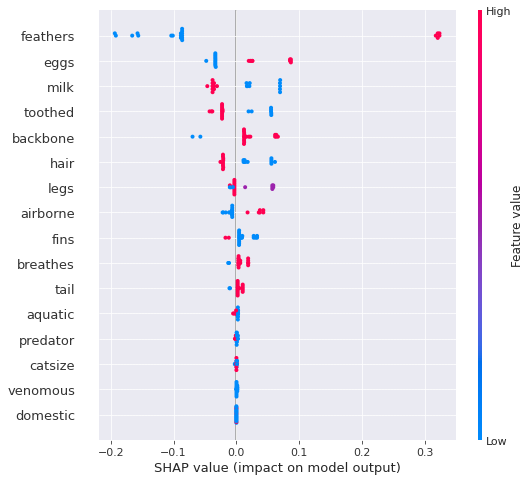

In [17]:
shap.summary_plot(shap_values[1], X_test)

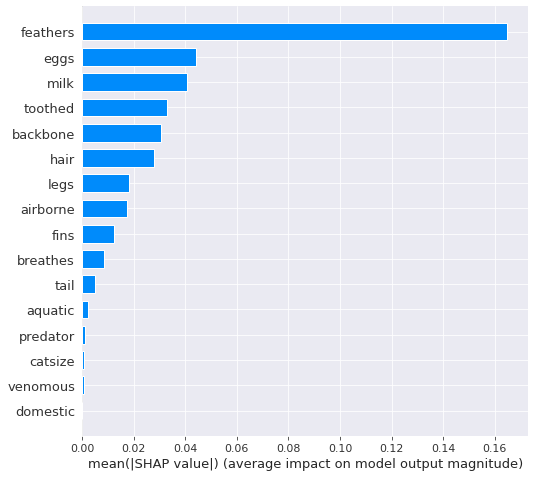

In [18]:
shap.summary_plot(shap_values[1], X_test, plot_type='bar')

### SHAP Dependence Plot

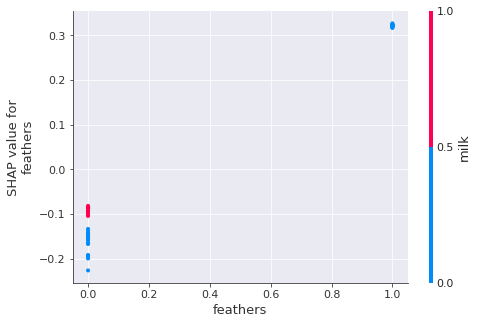

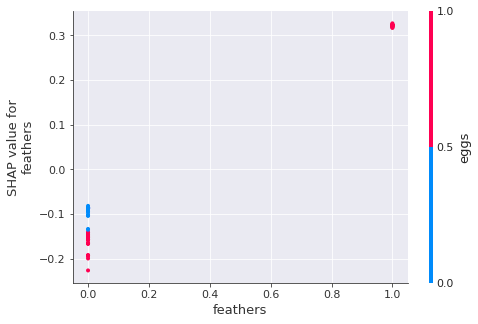

In [19]:
# we use whole of X data from more points on plot
shap_values = explainer.shap_values(X)
shap.dependence_plot('feathers', shap_values[1], X)
shap.dependence_plot('feathers', shap_values[1], X, interaction_index='eggs')

### SHAP Decision Plot

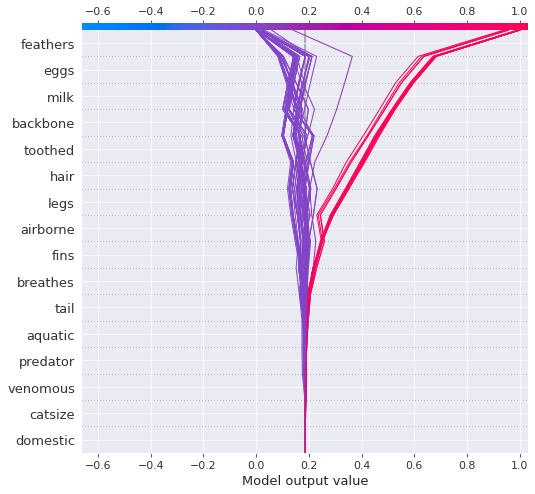

In [20]:
shap.decision_plot(explainer.expected_value[1], shap_values[1], X)

***
# **END**
***